## Лабораторная работа №2  
### Кластеризация методом k-means
### Экономика городов

Импортируем необходимые библиотеки.

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

from sklearn.cluster import KMeans
import os

In [2]:
df = pd.read_csv("Econom_Cities_data.csv", sep=";", decimal=',', index_col='City')
print(df)

                Work  Price  Salary
City                               
Amsterdam       1714   65.6    49.0
Athens          1792   53.8    30.4
Bogota          2152   37.9    11.5
Bombay          2052   30.3     5.3
Brussels        1708   73.8    50.5
Buenos_Aires    1971   56.1    12.5
Cairo          -9999   37.1 -9999.0
Caracas         2041   61.0    10.9
Chicago         1924   73.9    61.9
Copenhagen      1717   91.3    62.9
Dublin          1759   76.0    41.4
Dusseldorf      1693   78.5    60.2
Frankfurt       1650   74.5    60.4
Geneva          1880   95.9    90.3
Helsinki        1667  113.6    66.6
Hong_Kong       2375   63.8    27.8
Houston         1978   71.9    46.3
Jakarta        -9999   43.6 -9999.0
Johannesburg    1945   51.1    24.0
Kuala_Lumpur    2167   43.5     9.9
Lagos           1786   45.2     2.7
Lisbon          1742   56.2    18.8
London          1737   84.2    46.2
Los_Angeles     2068   79.8    65.2
Luxembourg      1768   71.1    71.1
Madrid          1710   93.8 

Проверим корректность данных. Можно заметить что в Cairo и Jakarta отрицательные Work и Price. Исключим их из выборки.

In [3]:
df = df.drop(index=["Jakarta","Cairo"])
from sklearn import preprocessing

Стандартизируем данные

In [4]:
stand_1 = preprocessing.StandardScaler()
# вычисляем параметры стандартизации 
stand_1.fit(df)
# преобразуем данные
X1 = stand_1.transform(df)
# Преобразуем её в объект класса pandas.DataFrame.
X1 = pd.DataFrame(X1, index=df.index, columns=df.columns)

Применим модель для разного числа кластеров, чтобы построить график каменистой осыпи.

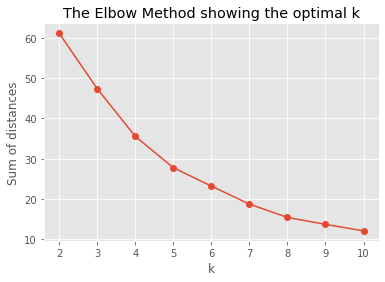

In [5]:
X1.head()
#Построим график для определения числа кластеров
K = range(2, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(X1) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

По графику видно, что начиная с к= 5 значения расстояний уменьшаются 
медленнее, значит число кластеров равно 5. 
С другой стороны, начиная с 7 график начинает меняться еще медленнее, 
Поэтому для проверки данных положим k=7
Выпоним кластеризация данных методом k-means

In [6]:
from sklearn.cluster import KMeans
# инициализация модели. По аналогии с предыдущей работой предполагаем, что кластеров 6
model = KMeans(n_clusters=5, random_state=42, max_iter=300, n_init=10, verbose=0 )

In [7]:
model.fit(X1)

KMeans(n_clusters=5, random_state=42)

In [8]:
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
0,1780.500000,108.550000,71.300000
1,1855.454545,50.781818,16.590909
2,2146.875000,48.762500,12.412500
3,1994.285714,75.814286,51.271429
4,1732.000000,78.135714,53.614286


### Таблица частот

In [9]:
df.groupby('cluster').size()

cluster
0     6
1    11
2     8
3     7
4    14
dtype: int64

In [10]:
df['cluster'].sort_values()

City
Zurich            0
Stockholm         0
Tokyo             0
Oslo              0
Geneva            0
Helsinki          0
Nicosia           1
Nairobi           1
Rio_de_Janeiro    1
San_Paulo         1
Mexico_City       1
Seoul             1
Lisbon            1
Lagos             1
Johannesburg      1
Athens            1
Buenos_Aires      1
Caracas           2
Bogota            2
Bombay            2
Manila            2
Hong_Kong         2
Panama            2
Kuala_Lumpur      2
Singpore          2
Los_Angeles       3
Chicago           3
Tel_Aviv          3
Toronto           3
Taipei            3
New_York          3
Houston           3
Sydney            4
Amsterdam         4
Montreal          4
Milan             4
Madrid            4
Vienna            4
London            4
Frankfurt         4
Dusseldorf        4
Dublin            4
Copenhagen        4
Brussels          4
Paris             4
Luxembourg        4
Name: cluster, dtype: int32

In [11]:
print ('Медиана work = ',df['Work'].median())
print ('Медиана price = ',df['Price'].median())
print ('Медиана salary = ',df['Salary'].median())

Медиана work =  1849.0
Медиана price =  70.94999999999999
Медиана salary =  43.65


#### В 0 группе 
Города с низким рабочим средневзвешенным, средними ценами и средней зарплатой 
В эту группу входят крупные города Европы и Сидней
#### в 1 города
С высоким рабочим средневзвешенным и низкими показателями цен и заработной платы
В эту группу входят крупные города Южной и Восточной Азии и Севера Южной Америки
#### во 2 группе
Страны со средним рабочим средневзвешенным  с низкой зарплатой,и низкими ценами
В эту группу входят города Южной Америки (Бразилия), Южной Европы, Южной Азии, Африки, а также города Сеул, Мехико
#### в 3 группе
Страны с низким рабочим средневзвешенным и высокими показателями цен и заработной платы
В эту группу входят крупные города Северной Европы и Швейцарии, а также Токио
#### в 4 группе
Высокое рабочее средневзвешенное, среднее значение цен, заработная плата средняя
В эту группу входят крупные города Северной Америки и город Тайпей

### Проврка кластеризации при k = 7

In [12]:
model2 = KMeans(n_clusters=7, random_state=42, max_iter=300, n_init=10, verbose=0 )
model2.fit(X1)

df['cluster'] = model2.labels_
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
0,1874.000000,97.950000,95.150000
1,1990.833333,77.233333,55.316667
2,2202.800000,43.100000,11.700000
3,1798.857143,50.942857,19.214286
4,1732.000000,78.135714,53.614286
5,1999.250000,55.487500,14.475000
6,1733.750000,113.850000,59.375000


### Таблица частот

In [13]:
df.groupby('cluster').size()

cluster
0     2
1     6
2     5
3     7
4    14
5     8
6     4
dtype: int64

In [14]:
df['cluster'].sort_values()

City
Zurich            0
Geneva            0
Los_Angeles       1
New_York          1
Toronto           1
Taipei            1
Houston           1
Chicago           1
Kuala_Lumpur      2
Hong_Kong         2
Manila            2
Bombay            2
Bogota            2
San_Paulo         3
Nicosia           3
Seoul             3
Lagos             3
Lisbon            3
Athens            3
Rio_de_Janeiro    3
Milan             4
Sydney            4
Montreal          4
Paris             4
Amsterdam         4
Dublin            4
Brussels          4
Copenhagen        4
Madrid            4
Dusseldorf        4
Frankfurt         4
Luxembourg        4
London            4
Vienna            4
Panama            5
Johannesburg      5
Nairobi           5
Singpore          5
Caracas           5
Buenos_Aires      5
Tel_Aviv          5
Mexico_City       5
Helsinki          6
Stockholm         6
Tokyo             6
Oslo              6
Name: cluster, dtype: int32

In [15]:
print ('Медиана work = ',df['Work'].median())
print ('Медиана price = ',df['Price'].median())
print ('Медиана salary = ',df['Salary'].median())

Медиана work =  1849.0
Медиана price =  70.94999999999999
Медиана salary =  43.65


#### в 0 группе 
Страны с низким рабочим средневзвешенным и высокими показателями цен и заработной платы
В эту группу входят крупные города Северной Европы и город Токио.

####  в 1 группе
Города с высоким рабочим средневзвешенным и низкими показателями цен и заработной платы  В эту группу входят крупные города Южной Америки,Африки, южной Азии. 

####  во 2 группе
Города с низким рабочим средневзвешенным, средними ценами и средней зарплатой 
 В эту группу входят крупные города Европы и города Сидней и Монреаль

####  в 3 группе
Высокое рабочее средневзвешенное и среднее значение цен, средняя заработная плата В эту группу входят крупные города Северной Америки и город Тайпей 

####  в 4 группе
Высокое рабочее средневзвешенное и низкое значение цен, низкая заработная плата В эту группу входят крупные города юго-восточной Азии и город Богота. Поскольку группа 1 
обладает теми же характеристиками имеет смысл объединить ее с группой 1 в один кластер

####  В 5 группе
Города со средним средневзвешенным, высокими ценами и высокими зарплатами В эту группу входят города Швейцарии

####  В 6 группе
Города с низким средневзвешенным, низкими ценами и низкими зарплатамиВ эту группу входят города южной Европы, запад Южной Америки, а также города Сеул, Лагос, Нискосия.

### Проврка кластеризации при k = 6

In [16]:
model2 = KMeans(n_clusters=6, random_state=42, max_iter=300, n_init=10, verbose=0 )
model2.fit(X1)
#выведем значения кластеров
df['cluster'] = model2.labels_
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
0,1780.500000,108.550000,71.300000
1,1798.857143,50.942857,19.214286
2,2202.800000,43.100000,11.700000
3,1990.833333,77.233333,55.316667
4,1732.000000,78.135714,53.614286
5,1999.250000,55.487500,14.475000


Поскольку значения в строках 1,4 незначительно отличаются, остановимся на том, что деление на 5 кластеров является оптимальным все же является вариант с 5 кластерам

## Вывод

Воспользовавшись методом k-means, мы разделили данные на 5 групп.  
Иерархический кластерный анализ дал 6 кластеров.
Более правильным я считаю деление первым методом. Поскольку вижу смысл в том,
чтобы выделить города Тайпей и Гонконг в одну группу.
Кроме того, в первом случае больше городов, принадлежащих одному региону находились вместе

---